In [2]:
using LinearAlgebra
using Plots

mutable struct Particle
    position::Vector{Float64}
    mass::Float64
end


function force(p1::Particle, p2::Particle)
    r = (p2.position .- p1.position)
    return r * p1.mass * p2.mass / norm(r, 2)^3
end

function accels(plist::Vector{Particle})
    a = [zeros(size(p.position)) for p in plist]
        
    for (i, p) in enumerate(plist)
        for j in plist
            if p != j
                a[i] += force(p, j) / p.mass
            end
        end
    end
                    
    return a
end

function update_particles(plist::Vector{Particle}, positions)
    for (i, _) in enumerate(plist)
        plist[i].position = positions[i]
    end
end


sun     = Particle([0, 0],     1)
earth   = Particle([0, 1],     3e-6)
jupiter = Particle([0, 5.36],  9.55e-4)
halley  = Particle([34.75, 0], 1e-14)

δt = 0.015

planets = [sun, earth, jupiter, halley]
planet_names = ["Sun", "Earth", "Jupiter", "Halley's comet"]
                            
v0 = [[0,0], [-1, 0], [-0.425,0], [0,0.0296]]

x_old = [p.position for p in planets]
x_n = x_old .+ v0 .* δt + accels(planets) .* 0.5 .* δt^2

4-element Vector{Vector{Float64}}:
 [9.316287976812795e-22, 4.077110018935174e-9]
 [-0.015, 0.9998875056517497]
 [-0.006375, 5.359996084160237]
 [34.74999990675095, 0.00044400001325568887]

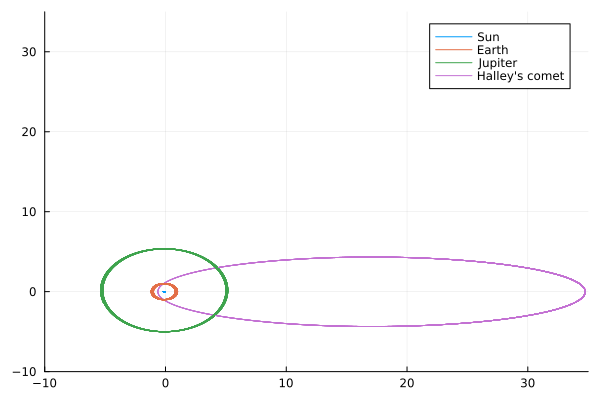

In [3]:
t_end=468

# p1 = plot(xlim=(-10, 35), ylim=(-10, 35))

update_particles(planets, x_n)

for i in 0:δt:t_end
    x_next = 2 .* x_n .- x_old .+ accels(planets) .* δt^2
    x_old = x_n
    x_n = x_next
    update_particles(planets, x_n)
    
#     for (j, _) in enumerate(planets)
#         plot!([x_old[j][1], x_n[j][1]], [x_old[j][2], x_n[j][2]], color=j, label= i==0 ? planet_names[j] : "")
#     end
end


# display(p1)
# png("./orbits.png")

display("image/png", read("./orbits.png"))
